In [229]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lightgbm
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingClassifier
import catboost

In [150]:
data = pd.read_csv('./data/train.csv')

In [152]:
data.HandsetPrice.unique()

array(['30', 'Unknown', '10', '80', '150', '300', '40', '200', '100',
       '130', '60', '400', '240', '250', '180', '500'], dtype=object)

In [ ]:
HandsetPrice

In [168]:
data = data.drop(columns=['CustomerID'])
data = data.dropna().reset_index(drop=True)

In [181]:
data.HandsetPrice.value_counts()

HandsetPrice
Unknown    28263
30          7147
150         4024
130         2043
80          1901
10          1869
60          1730
200         1227
100         1209
40           240
400           45
250           20
300           12
180            9
500            7
240            6
Name: count, dtype: int64

In [189]:
n_data = data.drop(columns=['HandsetPrice'])

label_encoders = {}
for column in ('Churn','ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice', 'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode','Occupation', 'MaritalStatus'):
    label_encoder = LabelEncoder()
    data.loc[:, column] = label_encoder.fit_transform(data[column])

    label_encoders.update({column: label_encoder})

In [191]:
label_encoders = {}
for column in ('Churn','ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode','Occupation', 'MaritalStatus'):
    label_encoder = LabelEncoder()
    n_data.loc[:, column] = label_encoder.fit_transform(n_data[column])

    label_encoders.update({column: label_encoder})

In [192]:
n_data = n_data.drop(columns=['ServiceArea'])

In [193]:
n_data.loc[:, (n_data.dtypes == object)].max()

Churn                      1
ChildrenInHH               1
HandsetRefurbished         1
HandsetWebCapable          1
TruckOwner                 1
RVOwner                    1
Homeownership              1
BuysViaMailOrder           1
RespondsToMailOffers       1
OptOutMailings             1
NonUSTravel                1
OwnsComputer               1
HasCreditCard              1
NewCellphoneUser           1
NotNewCellphoneUser        1
OwnsMotorcycle             1
MadeCallToRetentionTeam    1
CreditRating               6
PrizmCode                  3
Occupation                 7
MaritalStatus              2
dtype: object

In [194]:
train, temp = train_test_split(n_data, test_size= 0.4, random_state=0)
valid, test = train_test_split(temp, test_size= 0.5, random_state=0)

In [195]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29851 entries, 28530 to 2732
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      29851 non-null  object 
 1   MonthlyRevenue             29851 non-null  float64
 2   MonthlyMinutes             29851 non-null  float64
 3   TotalRecurringCharge       29851 non-null  float64
 4   DirectorAssistedCalls      29851 non-null  float64
 5   OverageMinutes             29851 non-null  float64
 6   RoamingCalls               29851 non-null  float64
 7   PercChangeMinutes          29851 non-null  float64
 8   PercChangeRevenues         29851 non-null  float64
 9   DroppedCalls               29851 non-null  float64
 10  BlockedCalls               29851 non-null  float64
 11  UnansweredCalls            29851 non-null  float64
 12  CustomerCareCalls          29851 non-null  float64
 13  ThreewayCalls              29851 non-null  float

In [196]:
train = train.astype(dict(zip(np.extract(train.dtypes == object, train.columns), ['category']*21)))
valid = valid.astype(dict(zip(np.extract(valid.dtypes == object, valid.columns), ['category']*21)))
test = test.astype(dict(zip(np.extract(test.dtypes == object, test.columns), ['category']*21)))

In [197]:
st = StandardScaler()
train.loc[:, (train.dtypes != 'category')] = st.fit_transform(train.loc[:, (train.dtypes != 'category')])
valid.loc[:, (train.dtypes != 'category')] = st.transform(valid.loc[:, (train.dtypes != 'category')])
test.loc[:, (train.dtypes != 'category')] = st.transform(test.loc[:, (train.dtypes != 'category')])

C:\Users\USER\AppData\Local\Temp\ipykernel_19808\32813475.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.17660499 -0.79329011 -0.5877284  ... -0.89607096 -0.89607096
  1.57066952]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train.loc[:, (train.dtypes != 'category')] = st.fit_transform(train.loc[:, (train.dtypes != 'category')])
C:\Users\USER\AppData\Local\Temp\ipykernel_19808\32813475.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.61415888  0.53389402 -0.61415888 ... -0.61415888 -0.61415888
  0.53389402]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train.loc[:, (train.dtypes != 'category')] = st.fit_transform(train.loc[:, (train.dtypes != 'category')])
C:\Users\USER\AppData\Local\Temp\ipykernel_19808\32813475.py:2: FutureWarning: Setting

In [198]:
lgbm = lightgbm.LGBMClassifier(verbose = 0)
lgbm.fit(train.drop(columns=['Churn']), train['Churn'],
        eval_set= [(valid.drop(columns=['Churn']), valid['Churn'])],
        
        )

lgbm.score(test.drop(columns=['Churn']), test['Churn'])

0.7242488192141493

In [199]:
feature_importances = pd.Series(lgbm.feature_importances_, index=train.drop(columns=['Churn']).columns)

In [202]:
top15 = feature_importances.sort_values(ascending=False)[:15]
print(top15)

MonthlyMinutes          213
PercChangeMinutes       209
PercChangeRevenues      184
MonthsInService         165
CurrentEquipmentDays    158
TotalRecurringCharge    157
PeakCallsInOut          114
MonthlyRevenue          111
OverageMinutes          111
DroppedBlockedCalls     104
UnansweredCalls          98
OffPeakCallsInOut        90
ReceivedCalls            89
OutboundCalls            89
InboundCalls             84
dtype: int32


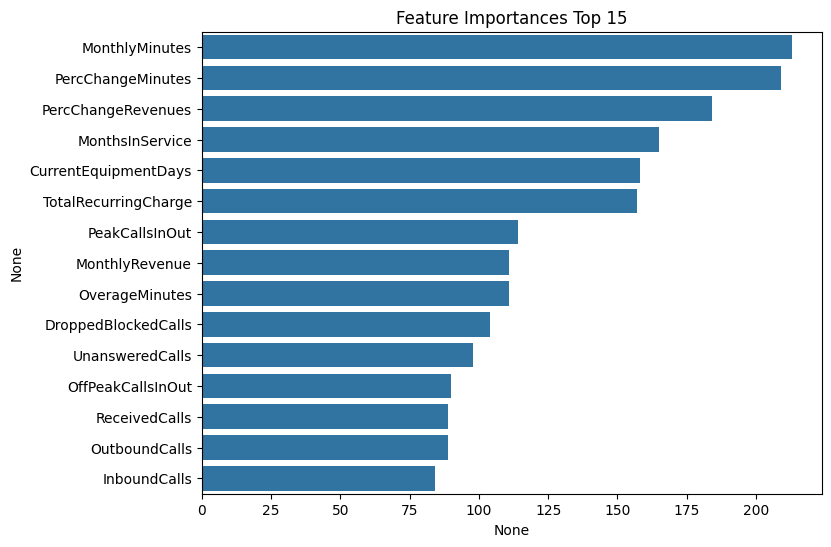

In [203]:
plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 15')
sns.barplot(x=top15, y=top15.index)
plt.show()

In [204]:
ndata = n_data.loc[:, (top15.index)]

In [215]:
ndata['Churn'] = n_data['Churn'].astype('category')

In [216]:
train, temp = train_test_split(ndata, test_size= 0.4, random_state=0)
valid, test = train_test_split(temp, test_size= 0.5, random_state=0)

In [217]:
st = StandardScaler()
train.loc[:, (train.dtypes != 'category')] = st.fit_transform(train.loc[:, (train.dtypes != 'category')])
valid.loc[:, (train.dtypes != 'category')] = st.transform(valid.loc[:, (train.dtypes != 'category')])
test.loc[:, (train.dtypes != 'category')] = st.transform(test.loc[:, (train.dtypes != 'category')])

C:\Users\USER\AppData\Local\Temp\ipykernel_19808\32813475.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.17660499 -0.79329011 -0.5877284  ... -0.89607096 -0.89607096
  1.57066952]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train.loc[:, (train.dtypes != 'category')] = st.fit_transform(train.loc[:, (train.dtypes != 'category')])
C:\Users\USER\AppData\Local\Temp\ipykernel_19808\32813475.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.9539844   0.44008013 -0.48494755 ...  0.33729928 -0.5877284
  0.64564184]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  valid.loc[:, (train.dtypes != 'category')] = st.transform(valid.loc[:, (train.dtypes != 'category')])
C:\Users\USER\AppData\Local\Temp\ipykernel_19808\32813475.py:4: FutureWarning: Setting an i

In [220]:
lgbm = lightgbm.LGBMClassifier(verbose = 0)
lgbm.fit(train.drop(columns=['Churn']), train['Churn'],
        eval_set= [(valid.drop(columns=['Churn']), valid['Churn'])],
        
        )

lgbm.score(test.drop(columns=['Churn']), test['Churn'])

0.7205305999397046

In [222]:
bc = BaggingClassifier()
bc.fit(train.drop(columns=['Churn']), train['Churn'],
        )

bc.score(test.drop(columns=['Churn']), test['Churn'])

0.7001306401366697

In [225]:
rf = RandomForestClassifier()
rf.fit(train.drop(columns=['Churn']), train['Churn'],
        )

rf.score(test.drop(columns=['Churn']), test['Churn'])

0.7184202592704251

In [227]:
xgboost = xgb.XGBClassifier()
xgboost.fit(train.drop(columns=['Churn']), train['Churn'],
        eval_set= [(valid.drop(columns=['Churn']), valid['Churn'])],
        )

xgboost.score(test.drop(columns=['Churn']), test['Churn'])

[0]	validation_0-logloss:0.59158
[1]	validation_0-logloss:0.58400
[2]	validation_0-logloss:0.57999
[3]	validation_0-logloss:0.57737
[4]	validation_0-logloss:0.57578
[5]	validation_0-logloss:0.57470
[6]	validation_0-logloss:0.57380
[7]	validation_0-logloss:0.57329
[8]	validation_0-logloss:0.57199
[9]	validation_0-logloss:0.57225
[10]	validation_0-logloss:0.57211
[11]	validation_0-logloss:0.57174
[12]	validation_0-logloss:0.57189
[13]	validation_0-logloss:0.57211
[14]	validation_0-logloss:0.57237
[15]	validation_0-logloss:0.57237
[16]	validation_0-logloss:0.57281
[17]	validation_0-logloss:0.57310
[18]	validation_0-logloss:0.57389
[19]	validation_0-logloss:0.57369
[20]	validation_0-logloss:0.57393
[21]	validation_0-logloss:0.57397
[22]	validation_0-logloss:0.57399
[23]	validation_0-logloss:0.57431
[24]	validation_0-logloss:0.57442
[25]	validation_0-logloss:0.57509
[26]	validation_0-logloss:0.57559
[27]	validation_0-logloss:0.57571
[28]	validation_0-logloss:0.57572
[29]	validation_0-loglos

0.7096774193548387

In [230]:
catboost_model = catboost.CatBoostClassifier()
catboost_model.fit(train.drop(columns=['Churn']), train['Churn'],
        eval_set= [(valid.drop(columns=['Churn']), valid['Churn'])],
        )

catboost_model.score(test.drop(columns=['Churn']), test['Churn'])

Learning rate set to 0.07332
0:	learn: 0.6768749	test: 0.6776013	best: 0.6776013 (0)	total: 131ms	remaining: 2m 10s
1:	learn: 0.6628579	test: 0.6642867	best: 0.6642867 (1)	total: 153ms	remaining: 1m 16s
2:	learn: 0.6507482	test: 0.6528588	best: 0.6528588 (2)	total: 174ms	remaining: 57.9s
3:	learn: 0.6401577	test: 0.6428270	best: 0.6428270 (3)	total: 185ms	remaining: 45.9s
4:	learn: 0.6310077	test: 0.6340838	best: 0.6340838 (4)	total: 193ms	remaining: 38.5s
5:	learn: 0.6229386	test: 0.6264730	best: 0.6264730 (5)	total: 202ms	remaining: 33.4s
6:	learn: 0.6162208	test: 0.6201385	best: 0.6201385 (6)	total: 210ms	remaining: 29.8s
7:	learn: 0.6106020	test: 0.6147986	best: 0.6147986 (7)	total: 217ms	remaining: 26.9s
8:	learn: 0.6058158	test: 0.6104449	best: 0.6104449 (8)	total: 224ms	remaining: 24.7s
9:	learn: 0.6012381	test: 0.6062194	best: 0.6062194 (9)	total: 231ms	remaining: 22.9s
10:	learn: 0.5975766	test: 0.6028637	best: 0.6028637 (10)	total: 239ms	remaining: 21.4s
11:	learn: 0.5942539	

0.7218370013064014

In [231]:
feature_importances = pd.Series(lgbm.feature_importances_, index=train.drop(columns=['Churn']).columns)
top15 = feature_importances.sort_values(ascending=False)[:15]
print(top15)

PercChangeMinutes       303
PercChangeRevenues      289
MonthlyMinutes          282
CurrentEquipmentDays    236
MonthlyRevenue          228
MonthsInService         209
TotalRecurringCharge    201
PeakCallsInOut          171
OffPeakCallsInOut       167
DroppedBlockedCalls     164
UnansweredCalls         161
ReceivedCalls           159
OutboundCalls           151
OverageMinutes          149
InboundCalls            130
dtype: int32


In [235]:
train.corr().Churn

MonthlyMinutes         -0.049870
PercChangeMinutes      -0.035099
PercChangeRevenues      0.012148
MonthsInService         0.018928
CurrentEquipmentDays    0.104227
TotalRecurringCharge   -0.058680
PeakCallsInOut         -0.040149
MonthlyRevenue         -0.011351
OverageMinutes          0.015908
DroppedBlockedCalls    -0.013877
UnansweredCalls        -0.029321
OffPeakCallsInOut      -0.041967
ReceivedCalls          -0.038378
OutboundCalls          -0.032935
InboundCalls           -0.034633
Churn                   1.000000
Name: Churn, dtype: float64

NameError: name 'top15' is not defined

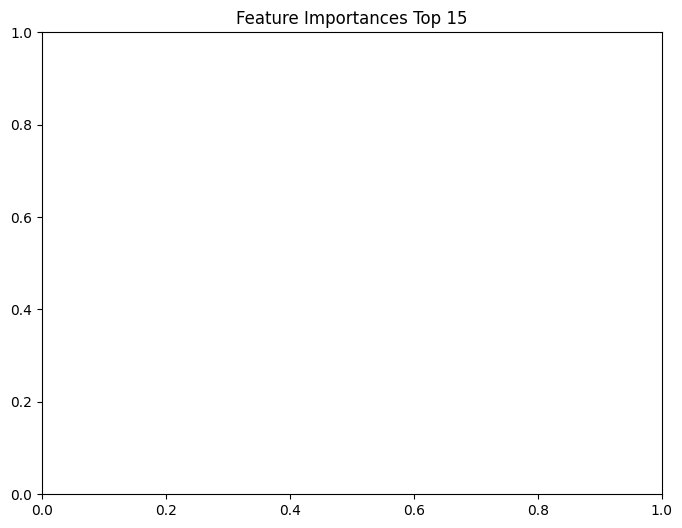

In [11]:
plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 15')
sns.barplot(x=top15, y=top15.index)
plt.show()

In [12]:
new_train = train.filter(items = ['ServiceArea', 'PercChangeMinutes','MonthlyMinutes','CurrentEquipmentDays','PercChangeRevenues','MonthsInService','TotalRecurringCharge','TotalRecurringCharge','MonthlyRevenue','OverageMinutes','AgeHH1','OutboundCalls','UnansweredCalls','DroppedCalls','OffPeakCallsInOut','DroppedBlockedCalls','Churn'])
new_valid = valid.filter(items = ['ServiceArea', 'PercChangeMinutes','MonthlyMinutes','CurrentEquipmentDays','PercChangeRevenues','MonthsInService','TotalRecurringCharge','TotalRecurringCharge','MonthlyRevenue','OverageMinutes','AgeHH1','OutboundCalls','UnansweredCalls','DroppedCalls','OffPeakCallsInOut','DroppedBlockedCalls','Churn'])
new_test = test.filter(items = ['ServiceArea', 'PercChangeMinutes','MonthlyMinutes','CurrentEquipmentDays','PercChangeRevenues','MonthsInService','TotalRecurringCharge','TotalRecurringCharge','MonthlyRevenue','OverageMinutes','AgeHH1','OutboundCalls','UnansweredCalls','DroppedCalls','OffPeakCallsInOut','DroppedBlockedCalls','Churn'])

In [27]:
new_train = train.loc[:, (train.dtypes != 'category')]
new_valid = valid.loc[:, (valid.dtypes != 'category')]
new_test = test.loc[:, (test.dtypes != 'category')]

In [29]:
new_train['Churn'] = train['Churn']
new_valid['Churn'] = valid['Churn']
new_test['Churn'] = test['Churn']

C:\Users\USER\AppData\Local\Temp\ipykernel_19808\2096655392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train['Churn'] = train['Churn']
C:\Users\USER\AppData\Local\Temp\ipykernel_19808\2096655392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_valid['Churn'] = valid['Churn']
C:\Users\USER\AppData\Local\Temp\ipykernel_19808\2096655392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [31]:
lgbm = lightgbm.LGBMClassifier(verbose = 0)
lgbm.fit(new_train.drop(columns=['Churn']), new_train['Churn'],
        eval_set= [(new_valid.drop(columns=['Churn']), new_valid['Churn'])],
        
        )

lgbm.score(new_test.drop(columns=['Churn']), new_test['Churn'])

0.7251532509295548

In [46]:
feature_importances = pd.Series(lgbm.feature_importances_, index=new_train.drop(columns=['Churn']).columns)
top15 = feature_importances.sort_values(ascending=False)[:15]
print(top15)

PercChangeMinutes       231
MonthlyMinutes          217
PercChangeRevenues      205
MonthsInService         199
CurrentEquipmentDays    184
TotalRecurringCharge    172
MonthlyRevenue          154
OffPeakCallsInOut       114
OutboundCalls           110
DroppedBlockedCalls     104
OverageMinutes          103
UnansweredCalls         102
DroppedCalls            100
PeakCallsInOut           96
AgeHH1                   89
dtype: int32


In [58]:
top15.index

Index(['PercChangeMinutes', 'MonthlyMinutes', 'PercChangeRevenues',
       'MonthsInService', 'CurrentEquipmentDays', 'TotalRecurringCharge',
       'MonthlyRevenue', 'OffPeakCallsInOut', 'OutboundCalls',
       'DroppedBlockedCalls', 'OverageMinutes', 'UnansweredCalls',
       'DroppedCalls', 'PeakCallsInOut', 'AgeHH1'],
      dtype='object')

In [59]:
new_train.drop(columns=['Churn']).columns 

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'RetentionCalls', 'RetentionOffersAccepted',
       'ReferralsMadeBySubscriber', 'IncomeGroup',
       'AdjustmentsToCreditRating'],
      dtype='object')

In [50]:
top15.index

Index(['PercChangeMinutes', 'MonthlyMinutes', 'PercChangeRevenues',
       'MonthsInService', 'CurrentEquipmentDays', 'TotalRecurringCharge',
       'MonthlyRevenue', 'OffPeakCallsInOut', 'OutboundCalls',
       'DroppedBlockedCalls', 'OverageMinutes', 'UnansweredCalls',
       'DroppedCalls', 'PeakCallsInOut', 'AgeHH1'],
      dtype='object')

In [61]:
new_train = new_train.loc[:, (top15.index)]
new_valid = new_valid.loc[:, (top15.index)]
new_test = new_test.loc[:, (top15.index)]

In [62]:
new_train['Churn'] = train['Churn']
new_valid['Churn'] = valid['Churn']
new_test['Churn'] = test['Churn']

In [66]:
xgbc = xgb.XGBClassifier(verbose = 0)
xgbc.fit(new_train.drop(columns=['Churn']), new_train['Churn'],
        eval_set= [(new_valid.drop(columns=['Churn']), new_valid['Churn'])],
        
        )

xgbc.score(new_test.drop(columns=['Churn']), new_test['Churn'])

[0]	validation_0-logloss:0.59154
[1]	validation_0-logloss:0.58386
[2]	validation_0-logloss:0.57972
[3]	validation_0-logloss:0.57702
[4]	validation_0-logloss:0.57555
[5]	validation_0-logloss:0.57550
[6]	validation_0-logloss:0.57421
[7]	validation_0-logloss:0.57429
[8]	validation_0-logloss:0.57399
[9]	validation_0-logloss:0.57419
[10]	validation_0-logloss:0.57344
[11]	validation_0-logloss:0.57312
[12]	validation_0-logloss:0.57279
[13]	validation_0-logloss:0.57291
[14]	validation_0-logloss:0.57293
[15]	validation_0-logloss:0.57337
[16]	validation_0-logloss:0.57383
[17]	validation_0-logloss:0.57394
[18]	validation_0-logloss:0.57470
[19]	validation_0-logloss:0.57434
[20]	validation_0-logloss:0.57445
[21]	validation_0-logloss:0.57476
[22]	validation_0-logloss:0.57532
[23]	validation_0-logloss:0.57579
[24]	validation_0-logloss:0.57526
[25]	validation_0-logloss:0.57506
[26]	validation_0-logloss:0.57508
[27]	validation_0-logloss:0.57520
[28]	validation_0-logloss:0.57541
[29]	validation_0-loglos

c:\Users\USER\anaconda3\envs\deep_learning\lib\site-packages\xgboost\core.py:158: UserWarning: [10:26:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[54]	validation_0-logloss:0.58108
[55]	validation_0-logloss:0.58139
[56]	validation_0-logloss:0.58194
[57]	validation_0-logloss:0.58262
[58]	validation_0-logloss:0.58327
[59]	validation_0-logloss:0.58324
[60]	validation_0-logloss:0.58327
[61]	validation_0-logloss:0.58361
[62]	validation_0-logloss:0.58415
[63]	validation_0-logloss:0.58451
[64]	validation_0-logloss:0.58475
[65]	validation_0-logloss:0.58483
[66]	validation_0-logloss:0.58471
[67]	validation_0-logloss:0.58478
[68]	validation_0-logloss:0.58546
[69]	validation_0-logloss:0.58571
[70]	validation_0-logloss:0.58641
[71]	validation_0-logloss:0.58684
[72]	validation_0-logloss:0.58710
[73]	validation_0-logloss:0.58737
[74]	validation_0-logloss:0.58822
[75]	validation_0-logloss:0.58831
[76]	validation_0-logloss:0.58859
[77]	validation_0-logloss:0.58854
[78]	validation_0-logloss:0.58874
[79]	validation_0-logloss:0.58869
[80]	validation_0-logloss:0.58905
[81]	validation_0-logloss:0.58902
[82]	validation_0-logloss:0.58954
[83]	validatio

0.7115867751984725

In [63]:
lgbm = lightgbm.LGBMClassifier(verbose = 0)
lgbm.fit(new_train.drop(columns=['Churn']), new_train['Churn'],
        eval_set= [(new_valid.drop(columns=['Churn']), new_valid['Churn'])],
        
        )

lgbm.score(new_test.drop(columns=['Churn']), new_test['Churn'])

0.723243895085921

In [70]:
svc = SVC()
svc.fit(new_train.drop(columns=['Churn']), new_train['Churn']
        )

svc.score(new_test.drop(columns=['Churn']), new_test['Churn'])

0.7161089337755

In [73]:
x_new_train = new_train.drop(columns=['Churn'])
y_new_train = new_train['Churn']

In [75]:
smote = SMOTE(random_state=0)

In [76]:
x_new_train, y_new_train = smote.fit_resample(x_new_train, y_new_train)

In [77]:
lgbm = lightgbm.LGBMClassifier(verbose = 0)
lgbm.fit(x_new_train, y_new_train,
        eval_set= [(new_valid.drop(columns=['Churn']), new_valid['Churn'])],
        
        )

lgbm.score(new_test.drop(columns=['Churn']), new_test['Churn'])

0.7086724952266104